# Regularization and Variable Selection in linear models (Shrinkage Methods)

### LASSO, Ridge and Elastic Net


### Ridge
Ridge uses a tunable parameter that is used to minimized the coefficients as low as possible using this equation.

$$RSS(residual sum of squares) + \lambda \sum_{j=1}^{p} \beta_j^2$$

$\lambda  is \leq 0$ In this case ridge coefficients are adjusted to fit the data well but there is no really reduction of coefficients unless there contribution to the model is almost 0. Similar to the least squares technique for linear model ridge tries to minimize the RSS but it adds and adittional paramenter called the shrinkage penalty and this tends to reduce the coefficients toward zero.

###LASSO
LASSO relies open the linear model to reduce features using an alternative fitting procedure for estimating the coefficients. This procedure is more restrictive and reduce the coefficients that do not contribute to the model to 0.

It also uses a tunable parameter $\lambda$

$$RSS + \lambda \sum_{j=1}^{p} |\beta_j|$$

LASSO uses an L1 penalty instead of an L2. as mentioned before the shrinkage penalty in lasso tends to recude some variables to zero, if they have very low coefficients to beging with.

### Elastic Net

As we will explore next, LASSO present problems whit highly correlated datasets or high dimensional data where LASSO tends to select one variable from a group and ignore the others. Elastic net overcomes this difficulties by addind a quadratic term to the shrinkage penalty 

$$RSS + \lambda \sum_{j=1}^{p} |\beta_j|^2$$

We will follow the tutorial from [https://www4.stat.ncsu.edu/~post/josh/LASSO_Ridge_Elastic_Net_-_Examples.html](https://www4.stat.ncsu.edu/~post/josh/LASSO_Ridge_Elastic_Net_-_Examples.html). That gives a very good explanation to the differences and strenghts to the three different methods for variable selection.

In the first section we will simulate data taken from a normal distribution, where there is very small signal and lots of noise.

In [1]:
library(MASS)  # Package needed to generate correlated precictors
library(glmnet)  # Package to fit ridge/lasso/elastic net models

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-13



In [2]:
# Generate data
set.seed(19875)  # Set seed for reproducibility
n <- 1000  # Number of observations
p <- 5000  # Number of predictors included in model
real_p <- 15  # Number of true predictors
x <- matrix(rnorm(n*p), nrow=n, ncol=p)
y <- apply(x[,1:real_p], 1, sum) + rnorm(n)

# Split data into train (2/3) and test (1/3) sets
train_rows <- sample(1:n, .66*n)
x.train <- x[train_rows, ]
x.test <- x[-train_rows, ]

y.train <- y[train_rows]
y.test <- y[-train_rows]

In [3]:
# Fit models 
# (For plots on left):
fit.lasso <- glmnet(x.train, y.train, family="gaussian", alpha=1)
fit.ridge <- glmnet(x.train, y.train, family="gaussian", alpha=0)
fit.elnet <- glmnet(x.train, y.train, family="gaussian", alpha=.5)


# 10-fold Cross validation for each alpha = 0, 0.1, ... , 0.9, 1.0
# (For plots on Right)
for (i in 0:10) {
    assign(paste("fit", i, sep=""), cv.glmnet(x.train, y.train, type.measure="mse", 
                                              alpha=i/10,family="gaussian"))
}

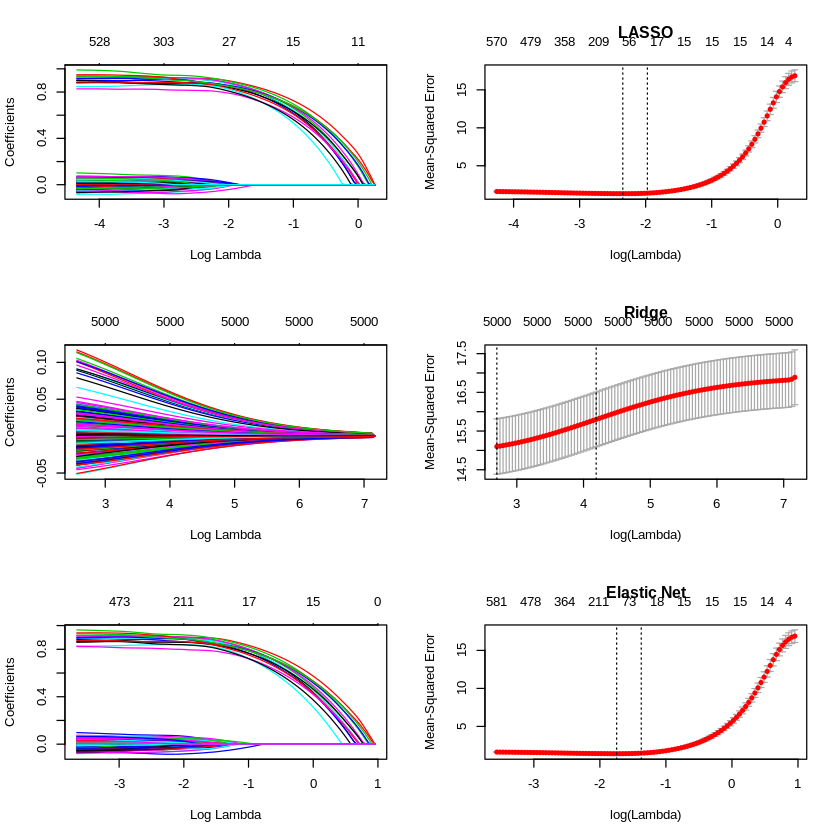

In [4]:
# Plot solution paths:
par(mfrow=c(3,2))
# For plotting options, type '?plot.glmnet' in R console
plot(fit.lasso, xvar="lambda")
plot(fit10, main="LASSO")

plot(fit.ridge, xvar="lambda")
plot(fit0, main="Ridge")

plot(fit.elnet, xvar="lambda")
plot(fit5, main="Elastic Net")

In [5]:
#MSE on test set
yhat0 <- predict(fit0, s=fit0$lambda.1se, newx=x.test)
yhat1 <- predict(fit1, s=fit1$lambda.1se, newx=x.test)
yhat2 <- predict(fit2, s=fit2$lambda.1se, newx=x.test)
yhat3 <- predict(fit3, s=fit3$lambda.1se, newx=x.test)
yhat4 <- predict(fit4, s=fit4$lambda.1se, newx=x.test)
yhat5 <- predict(fit5, s=fit5$lambda.1se, newx=x.test)
yhat6 <- predict(fit6, s=fit6$lambda.1se, newx=x.test)
yhat7 <- predict(fit7, s=fit7$lambda.1se, newx=x.test)
yhat8 <- predict(fit8, s=fit8$lambda.1se, newx=x.test)
yhat9 <- predict(fit9, s=fit9$lambda.1se, newx=x.test)
yhat10 <- predict(fit10, s=fit10$lambda.1se, newx=x.test)

mse0 <- mean((y.test - yhat0)^2)
mse1 <- mean((y.test - yhat1)^2)
mse2 <- mean((y.test - yhat2)^2)
mse3 <- mean((y.test - yhat3)^2)
mse4 <- mean((y.test - yhat4)^2)
mse5 <- mean((y.test - yhat5)^2)
mse6 <- mean((y.test - yhat6)^2)
mse7 <- mean((y.test - yhat7)^2)
mse8 <- mean((y.test - yhat8)^2)
mse9 <- mean((y.test - yhat9)^2)
mse10 <- mean((y.test - yhat10)^2)

mse0 ##Ridge
mse2
mse4
mse8
mse10 ##Lasso

[1] 16.15805

[1] 1.806264

[1] 1.435072

[1] 1.442729

[1] 1.375904

### LASSO is the winner! LASSO is good at picking up a small signal through lots of noise.

In the second part we will simulate new data, where the signal is strong but there is also lots of noice.

In [6]:
library(MASS)  # Package needed to generate correlated precictors
library(glmnet)  # Package to fit ridge/lasso/elastic net models

# Generate data
set.seed(19874)
n <- 1000    # Number of observations
p <- 5000     # Number of predictors included in model
real_p <- 1500  # Number of true predictors
x <- matrix(rnorm(n*p), nrow=n, ncol=p)
y <- apply(x[,1:real_p], 1, sum) + rnorm(n)

# Split data into train and test sets
train_rows <- sample(1:n, .66*n)
x.train <- x[train_rows, ]
x.test <- x[-train_rows, ]

y.train <- y[train_rows]
y.test <- y[-train_rows]

In [7]:
#FIT the Model

# Fit models:
fit.lasso <- glmnet(x.train, y.train, family="gaussian", alpha=1)
fit.ridge <- glmnet(x.train, y.train, family="gaussian", alpha=0)
fit.elnet <- glmnet(x.train, y.train, family="gaussian", alpha=.5)


# 10-fold Cross validation for each alpha = 0, 0.1, ... , 0.9, 1.0
fit.lasso.cv <- cv.glmnet(x.train, y.train, type.measure="mse", alpha=1, 
                          family="gaussian")
fit.ridge.cv <- cv.glmnet(x.train, y.train, type.measure="mse", alpha=0,
                          family="gaussian")
fit.elnet.cv <- cv.glmnet(x.train, y.train, type.measure="mse", alpha=.5,
                          family="gaussian")

for (i in 0:10) {
    assign(paste("fit", i, sep=""), cv.glmnet(x.train, y.train, type.measure="mse", 
                                              alpha=i/10,family="gaussian"))
}

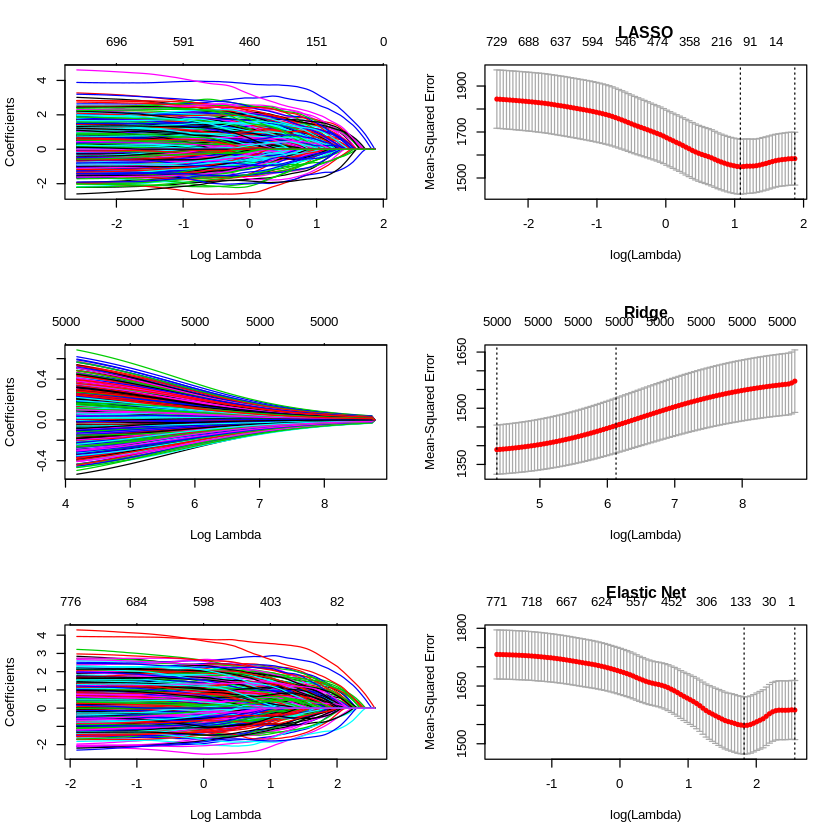

In [8]:
# Plot solution paths:
par(mfrow=c(3,2))
# For plotting options, type '?plot.glmnet' in R console
plot(fit.lasso, xvar="lambda")
plot(fit10, main="LASSO")

plot(fit.ridge, xvar="lambda")
plot(fit0, main="Ridge")

plot(fit.elnet, xvar="lambda")
plot(fit5, main="Elastic Net")

In [9]:
yhat0 <- predict(fit0, s=fit0$lambda.1se, newx=x.test)
yhat1 <- predict(fit1, s=fit1$lambda.1se, newx=x.test)
yhat2 <- predict(fit2, s=fit2$lambda.1se, newx=x.test)
yhat3 <- predict(fit3, s=fit3$lambda.1se, newx=x.test)
yhat4 <- predict(fit4, s=fit4$lambda.1se, newx=x.test)
yhat5 <- predict(fit5, s=fit5$lambda.1se, newx=x.test)
yhat6 <- predict(fit6, s=fit6$lambda.1se, newx=x.test)
yhat7 <- predict(fit7, s=fit7$lambda.1se, newx=x.test)
yhat8 <- predict(fit8, s=fit8$lambda.1se, newx=x.test)
yhat9 <- predict(fit9, s=fit9$lambda.1se, newx=x.test)
yhat10 <- predict(fit10, s=fit10$lambda.1se, newx=x.test)

mse0 <- mean((y.test - yhat0)^2)
mse1 <- mean((y.test - yhat1)^2)
mse2 <- mean((y.test - yhat2)^2)
mse3 <- mean((y.test - yhat3)^2)
mse4 <- mean((y.test - yhat4)^2)
mse5 <- mean((y.test - yhat5)^2)
mse6 <- mean((y.test - yhat6)^2)
mse7 <- mean((y.test - yhat7)^2)
mse8 <- mean((y.test - yhat8)^2)
mse9 <- mean((y.test - yhat9)^2)
mse10 <- mean((y.test - yhat10)^2)

mse0 ##Ridge
mse2
mse4
mse8
mse10 ##Lasso

[1] 1494.07

[1] 1637.895

[1] 1641.141

[1] 1641.141

[1] 1641.141

### Ridge is the winner! Ridge in general is good at prediction, but is not very interpretable.

Finally we will evaluate when the signal is variable but there is high correlation among the variables.

In [10]:
# Generate data
set.seed(19873)
n <- 100    # Number of observations
p <- 50     # Number of predictors included in model
CovMatrix <- outer(1:p, 1:p, function(x,y) {.7^abs(x-y)})
x <- mvrnorm(n, rep(0,p), CovMatrix)
y <- 10 * apply(x[, 1:2], 1, sum) + 
  5 * apply(x[, 3:4], 1, sum) +
  apply(x[, 5:14], 1, sum) +
  rnorm(n)

# Split data into train and test sets
train_rows <- sample(1:n, .66*n)
x.train <- x[train_rows, ]
x.test <- x[-train_rows, ]

y.train <- y[train_rows]
y.test <- y[-train_rows]

In [11]:
# Fit models:
fit.lasso <- glmnet(x.train, y.train, family="gaussian", alpha=1)
fit.ridge <- glmnet(x.train, y.train, family="gaussian", alpha=0)
fit.elnet <- glmnet(x.train, y.train, family="gaussian", alpha=.5)


# 10-fold Cross validation for each alpha = 0, 0.1, ... , 0.9, 1.0
fit.lasso.cv <- cv.glmnet(x.train, y.train, type.measure="mse", alpha=1, 
                          family="gaussian")
fit.ridge.cv <- cv.glmnet(x.train, y.train, type.measure="mse", alpha=0,
                          family="gaussian")
fit.elnet.cv <- cv.glmnet(x.train, y.train, type.measure="mse", alpha=.5,
                          family="gaussian")

for (i in 0:10) {
    assign(paste("fit", i, sep=""), cv.glmnet(x.train, y.train, type.measure="mse", 
                                              alpha=i/10,family="gaussian"))
}

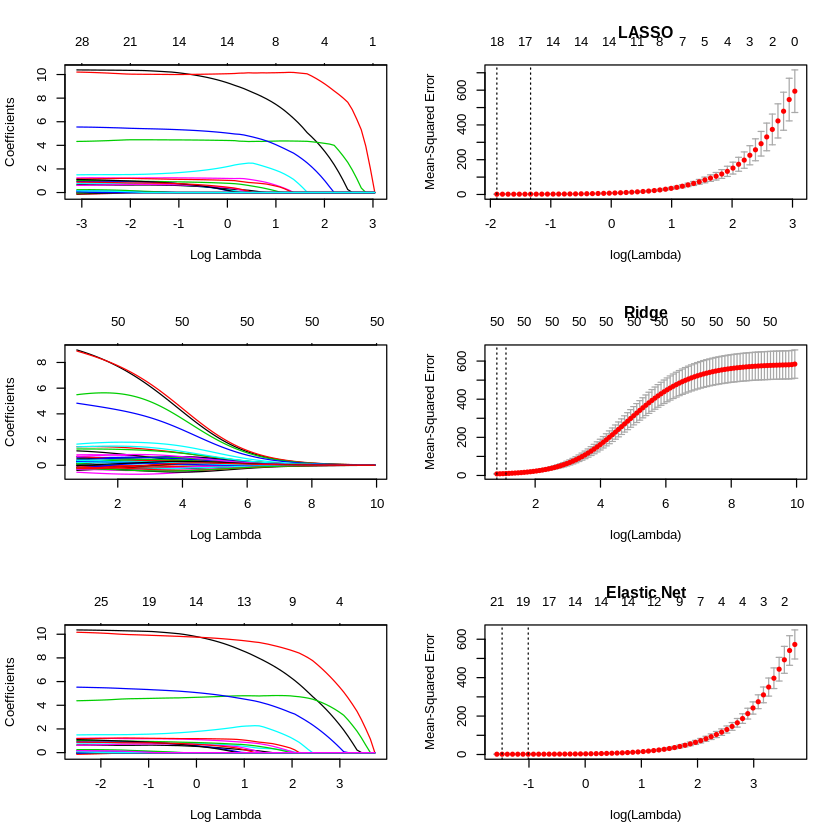

In [12]:
# Plot solution paths:
par(mfrow=c(3,2))
# For plotting options, type '?plot.glmnet' in R console
plot(fit.lasso, xvar="lambda")
plot(fit10, main="LASSO")

plot(fit.ridge, xvar="lambda")
plot(fit0, main="Ridge")

plot(fit.elnet, xvar="lambda")
plot(fit5, main="Elastic Net")

In [13]:
yhat0 <- predict(fit0, s=fit0$lambda.1se, newx=x.test)
yhat1 <- predict(fit1, s=fit1$lambda.1se, newx=x.test)
yhat2 <- predict(fit2, s=fit2$lambda.1se, newx=x.test)
yhat3 <- predict(fit3, s=fit3$lambda.1se, newx=x.test)
yhat4 <- predict(fit4, s=fit4$lambda.1se, newx=x.test)
yhat5 <- predict(fit5, s=fit5$lambda.1se, newx=x.test)
yhat6 <- predict(fit6, s=fit6$lambda.1se, newx=x.test)
yhat7 <- predict(fit7, s=fit7$lambda.1se, newx=x.test)
yhat8 <- predict(fit8, s=fit8$lambda.1se, newx=x.test)
yhat9 <- predict(fit9, s=fit9$lambda.1se, newx=x.test)
yhat10 <- predict(fit10, s=fit10$lambda.1se, newx=x.test)

mse0 <- mean((y.test - yhat0)^2)
mse1 <- mean((y.test - yhat1)^2)
mse2 <- mean((y.test - yhat2)^2)
mse3 <- mean((y.test - yhat3)^2)
mse4 <- mean((y.test - yhat4)^2)
mse5 <- mean((y.test - yhat5)^2)
mse6 <- mean((y.test - yhat6)^2)
mse7 <- mean((y.test - yhat7)^2)
mse8 <- mean((y.test - yhat8)^2)
mse9 <- mean((y.test - yhat9)^2)
mse10 <- mean((y.test - yhat10)^2)

mse0 ##Ridge
mse2
mse4
mse8
mse10 ##Lasso

[1] 9.271376

[1] 1.443999

[1] 1.480626

[1] 1.420962

[1] 1.724119

### In this case Ridge was the worse shrinkage method, eventhough the diagnostic plots between ridge and elastic nets are very similar. Elastic Net is the winner! 

In the folowing tutorial, the authors demonstrate the use of lasso in the logistic regresion. 

In this cases we will be transforming the continuous outcome to discrete, and the evaluation to the model will rely on the constrast differences between the categorical predictors. 

https://eight2late.wordpress.com/2017/07/11/a-gentle-introduction-to-logistic-regression-and-lasso-regularisation-using-r/